#      IMDB TOP MOVIE PROJECT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import sleep
from random import randint

import re
import time
import requests
from bs4 import BeautifulSoup
import csv


In [2]:
# Identify the URL
URL = 'https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating'
URL

'https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating'

In [3]:
# loading the web page 

htmlpage = requests.get(URL)

In [4]:
type(htmlpage)

requests.models.Response

In [5]:
htmlpage.status_code

200

In [6]:
htmlpage.text

'\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>IMDb &quot;Top 1000&quot;\n(Sorted by IMDb Rating Descending) - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1});\n    }\n</script>\n<script>\n    if (typeof uex == \'function\') {\n      uex("ld", "LoadTitle", {wb: 1});\n    }\n</script>\n\n        <link rel="canonical" href="https://ww

In [7]:
soup = BeautifulSoup(htmlpage.text)

In [8]:
type(soup)

bs4.BeautifulSoup

In [9]:
print(soup.prettify())

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   IMDb "Top 1000"
(Sorted by IMDb Rating Descending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
  </script>
  <link href="https://www.imdb.com/search/title/?groups=top_1000" rel="canonical"/>
  <meta content="http://www

In [10]:
Title = []
year = []
time = []
rating = []
certificate = []
votes = []
gross = []
metascore = []


In [11]:
movies_data = soup.find('div', attrs = {'class': 'lister-item mode-advanced'})

In [12]:
movie_data = soup.find_all('div', attrs = {'class': 'lister-item mode-advanced'})
sleep(randint(2,8))
    

In [13]:
for store in movie_data:
        name = store.h3.a.text
        Title.append(name)

In [14]:
len(Title)

100

In [36]:
year_of_release = store.h3.find('span', class_="lister-item-year text-muted unbold").text
year_of_release

'(1971)'

In [37]:
year

[]

In [39]:
len(year_of_release)

6

In [18]:
rate = store.find('div', class_ = 'inline-block ratings-imdb-rating').text.replace('\n', '')



In [19]:
rate

'8.3'

In [20]:
len(rate)

3

In [21]:
meta = store.find('span', class_="metascore").text if store.find('span', class_="metascore")else"****"
        

In [22]:
meta

'77        '

In [23]:
certificate = store.find('span', class_="certificate").text
certificate

'A'

In [24]:
certificate

'A'

In [25]:
for store in movie_data:
        name = store.h3.a.text
        Title.append(name)
        
        
    
        value = store.find_all('span', attrs = {'name': "nv"})
        
        vote = value[0].text
        votes.append(vote)
        
        
        grosses = value[1].text if len(value)>1 else'&&&&'
        gross.append(grosses)

In [26]:
len(votes)

100

In [27]:
len(meta)

10

In [28]:
len(gross)

100

# find_all()

In [29]:
Title = soup.find('div', attrs = {'class': 'lister-item mode-advanced'})

Title

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt0111161"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt0111161/"> <img alt="The Shawshank Redemption" class="loadlate" data-tconst="tt0111161" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BNDE3ODcxYzMtY2YzZC00NmNlLWJiNDMtZDViZWM2MzIxZDYwXkEyXkFqcGdeQXVyNjAwNDUxODI@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt0111161/">The Shawshank Redemption</a>
<span class="lister-item-year text-muted unbold">(1994)</span>
</h3>
<p class="text-muted">
<span class="certificate">A</span>
<span class="ghost">|</span>
<span class="runtime">142 min</span>
<span class="ghost">|</span>
<span class="genre">
Dram

In [30]:
len(Title)

7

In [31]:
for store in movie_data:
        name = store.h3.a.text
        Title.append(name)
        

In [32]:
Title

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt0111161"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt0111161/"> <img alt="The Shawshank Redemption" class="loadlate" data-tconst="tt0111161" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BNDE3ODcxYzMtY2YzZC00NmNlLWJiNDMtZDViZWM2MzIxZDYwXkEyXkFqcGdeQXVyNjAwNDUxODI@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt0111161/">The Shawshank Redemption</a>
<span class="lister-item-year text-muted unbold">(1994)</span>
</h3>
<p class="text-muted">
<span class="certificate">A</span>
<span class="ghost">|</span>
<span class="runtime">142 min</span>
<span class="ghost">|</span>
<span class="genre">
Dram

In [33]:
len(Title)

107

In [34]:
Title = []
year = []
time = []
rating = []
certificate = []
votes = []
gross = []
metascore = []


In [40]:
year = []
for store in movie_data:
        name = store.h3.a.text
        Title.append(name)
        
       
         year_of_release = store.h3.find('span', class_="lister-item-year text-muted unbold").text
         year.append(year_of_release)
        

IndentationError: unexpected indent (2511515462.py, line 7)

In [41]:
len(year)

0

In [42]:
time = []
for store in movie_data:
        name = store.h3.a.text
        Title.append(name)
        
        runtime = store.p.find("span", class_= 'runtime').text
        time.append(runtime)

In [43]:
len(time)

100

In [44]:
ratig = []
for store in movie_data:
        name = store.h3.a.text
        Title.append(name)
        
        rate = store.find('div', class_ = 'inline-block ratings-imdb-rating').text.replace('\n', '')
        rating.append(rate)

In [108]:
len(rating)

200

In [109]:
certificate = store.find('span', class_="certificate")
certificate

<span class="certificate">A</span>

In [47]:
certificate = []
for store in movie_data:
        name = store.h3.a.text
        Title.append(name)
        
        certificates = store.find('span', class_="certificate")
        if(certificate is None):
            certificate.append(np.nan)
        else:
        
            certificate.append(certificates)
        

In [48]:

len(certificate)

100

In [49]:
for store in movie_data:
        name = store.h3.a.text
        Title.append(name)
        
        
    
        value = store.find_all('span', attrs = {'name': "nv"})
        
        vote = value[0].text
        votes.append(vote)
        
        
        grosses = value[1].text if len(value)>1 else'&&&&'
        gross.append(grosses)
        
       
        

In [50]:
len(votes)

100

In [51]:
len(gross)

100

In [52]:
meta

'77        '

In [53]:
len(meta)

10

In [54]:
Title = []
year = []
time = []
rating = []
certificate = []
votes = []
gross = []
metascore = []
        
        

In [55]:
for store in movie_data:
        name = store.h3.a.text
        Title.append(name)
        

        meta = store.find('span', class_="metascore").text if store.find('span', class_="metascore")else"****"
        metascore.append(meta)
        

In [56]:
len(meta)

10

In [57]:
Title = []
year = []
time = []
rating = []
certificate = []
votes = []
gross = []
metascore = []
        

In [61]:
for store in movie_data:
        name = store.h3.a.text
        Title.append(name)
        
        year_of_release = store.h3.find('span', class_="lister-item-year text-muted unbold").text
        year.append(year_of_release)
        
        runtime = store.p.find("span", class_= 'runtime').text
        time.append(runtime)
        
        rate = store.find('div', class_ = 'inline-block ratings-imdb-rating').text.replace('\n', '')
        rating.append(rate)
       
        
        meta = store.find('span', class_="metascore").text if store.find('span', class_="metascore")else"****"
        metascore.append(meta)
        
        value = store.find_all('span', attrs = {'name': "nv"})
        
        vote = value[0].text
        votes.append(vote)
        
        
        grosses = value[1].text if len(value)>1 else'&&&&'
        gross.append(grosses)
        
        certificates = store.find('span', class_="certificate")
        certificate.append(certificates)

In [62]:
movie_df =pd.DataFrame({"Title": Title,
                        "Year_of_release": year, 
                        "Watching Time": time, 
                        "Rate": rate, 
                        "Metascore": metascore, 
                        "Votes": vote,
                        "Gross":gross,
                       "certificate":certificates})


In [63]:
movie_df

,Title,Year_of_release,Watching Time,Rate,Metascore,Votes,Gross,certificate
0,The Shawshank Redemption,(1994),142 min,8.3,82,"845,644",$28.34M,A
1,The Godfather,(1972),175 min,8.3,100,"845,644",$134.97M,A
2,The Dark Knight,(2008),152 min,8.3,84,"845,644",$534.86M,A
3,Schindler's List,(1993),195 min,8.3,95,"845,644",$96.90M,A
4,The Lord of the Rings: The Return of the King,(2003),201 min,8.3,94,"845,644",$377.85M,A
...,...,...,...,...,...,...,...,...
195,Heat,(1995),170 min,8.3,76,"845,644",$67.44M,A
196,Scarface,(1983),170 min,8.3,65,"845,644",$45.60M,A
197,Star Wars: Episode VI - Return of the Jedi,(1983),131 min,8.3,58,"845,644",$309.13M,A
198,American Beauty,(1999),122 min,8.3,84,"845,644",$130.10M,A


In [64]:
len(movie_df)

200

In [65]:
movie_df.head()

,Title,Year_of_release,Watching Time,Rate,Metascore,Votes,Gross,certificate
0,The Shawshank Redemption,(1994),142 min,8.3,82,"845,644",$28.34M,A
1,The Godfather,(1972),175 min,8.3,100,"845,644",$134.97M,A
2,The Dark Knight,(2008),152 min,8.3,84,"845,644",$534.86M,A
3,Schindler's List,(1993),195 min,8.3,95,"845,644",$96.90M,A
4,The Lord of the Rings: The Return of the King,(2003),201 min,8.3,94,"845,644",$377.85M,A


In [66]:
movie_df.to_csv('movie.csv', index = False)

In [67]:
df = pd.read_csv('movie.csv')
df.head()

,Title,Year_of_release,Watching Time,Rate,Metascore,Votes,Gross,certificate
0,The Shawshank Redemption,(1994),142 min,8.3,82,"845,644",$28.34M,A
1,The Godfather,(1972),175 min,8.3,100,"845,644",$134.97M,A
2,The Dark Knight,(2008),152 min,8.3,84,"845,644",$534.86M,A
3,Schindler's List,(1993),195 min,8.3,95,"845,644",$96.90M,A
4,The Lord of the Rings: The Return of the King,(2003),201 min,8.3,94,"845,644",$377.85M,A


In [68]:
#head

movie_df.head()

,Title,Year_of_release,Watching Time,Rate,Metascore,Votes,Gross,certificate
0,The Shawshank Redemption,(1994),142 min,8.3,82,"845,644",$28.34M,A
1,The Godfather,(1972),175 min,8.3,100,"845,644",$134.97M,A
2,The Dark Knight,(2008),152 min,8.3,84,"845,644",$534.86M,A
3,Schindler's List,(1993),195 min,8.3,95,"845,644",$96.90M,A
4,The Lord of the Rings: The Return of the King,(2003),201 min,8.3,94,"845,644",$377.85M,A


In [69]:
str(movie_df['Title'])

"0                           The Shawshank Redemption\n1                                      The Godfather\n2                                    The Dark Knight\n3                                   Schindler's List\n4      The Lord of the Rings: The Return of the King\n                           ...                      \n195                                             Heat\n196                                         Scarface\n197       Star Wars: Episode VI - Return of the Jedi\n198                                  American Beauty\n199                               A Clockwork Orange\nName: Title, Length: 200, dtype: object"

In [70]:
movie_df['Title'][0]

'The Shawshank Redemption'

In [71]:
movie_df['Title'][1]

'The Godfather'

In [72]:
movie_df['Title'][10]

'The Lord of the Rings: The Fellowship of the Ring'

In [73]:
movie_df['Gross'][0]

'$28.34M'

In [74]:
re.findall('^[\w\s]+Certificate',movie_df['Title'][0])

[]

In [75]:
movie_df.head()

,Title,Year_of_release,Watching Time,Rate,Metascore,Votes,Gross,certificate
0,The Shawshank Redemption,(1994),142 min,8.3,82,"845,644",$28.34M,A
1,The Godfather,(1972),175 min,8.3,100,"845,644",$134.97M,A
2,The Dark Knight,(2008),152 min,8.3,84,"845,644",$534.86M,A
3,Schindler's List,(1993),195 min,8.3,95,"845,644",$96.90M,A
4,The Lord of the Rings: The Return of the King,(2003),201 min,8.3,94,"845,644",$377.85M,A


# Data Visualisation

In [116]:
movie_df.groupby(['Title'])['Watching Time'].max().plot(kind = 'bar')

TypeError: no numeric data to plot

In [82]:
#pip install seaborn

In [83]:
plt.figure(figsize=(15,7))

<Figure size 1500x700 with 0 Axes>

<Figure size 1500x700 with 0 Axes>

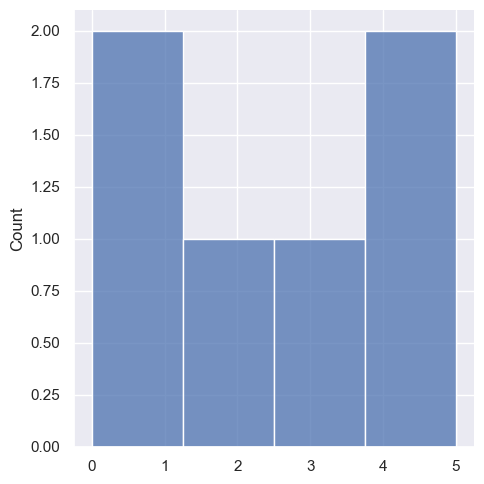

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot([0,1,2,3,4,5])
plt.show()

In [ ]:
foo = pd.DataFrame(columns =['Title', 'Metascore'])
for i in range(10):
    foo.loc[i] = ['no'+str(i), np.random.normal(i,2,10)]
    for j,b in enumerate(bar):
        foo.loc[i*10+j] = ['no'+str(i),b]

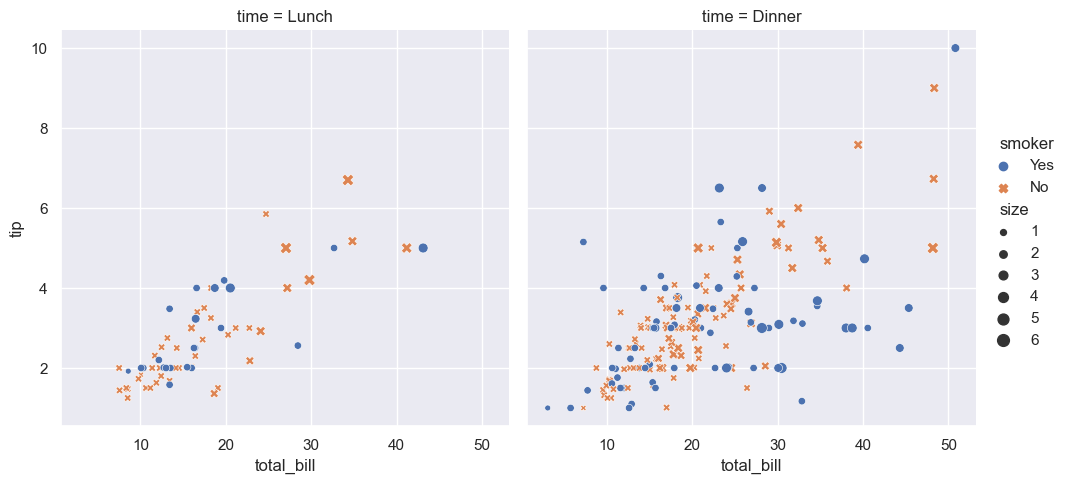

In [97]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

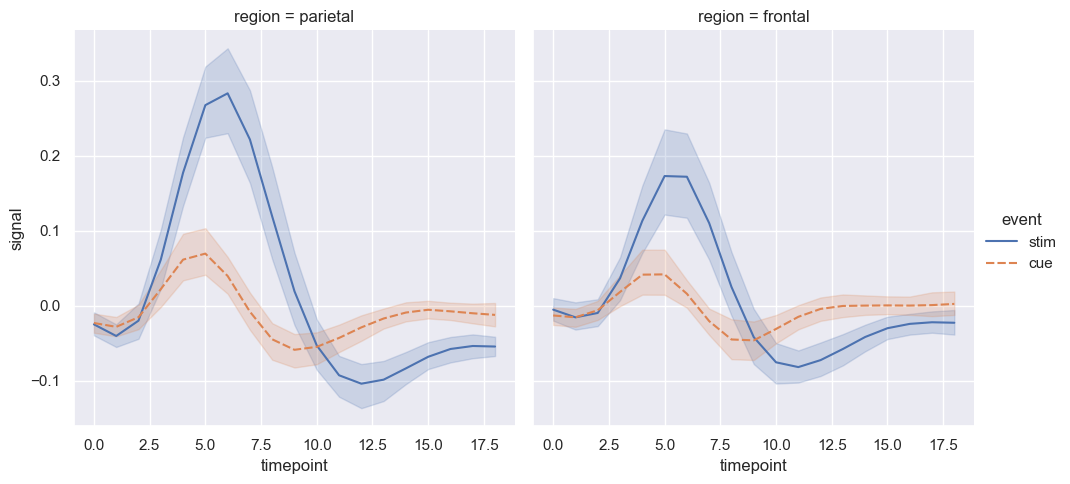

In [98]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

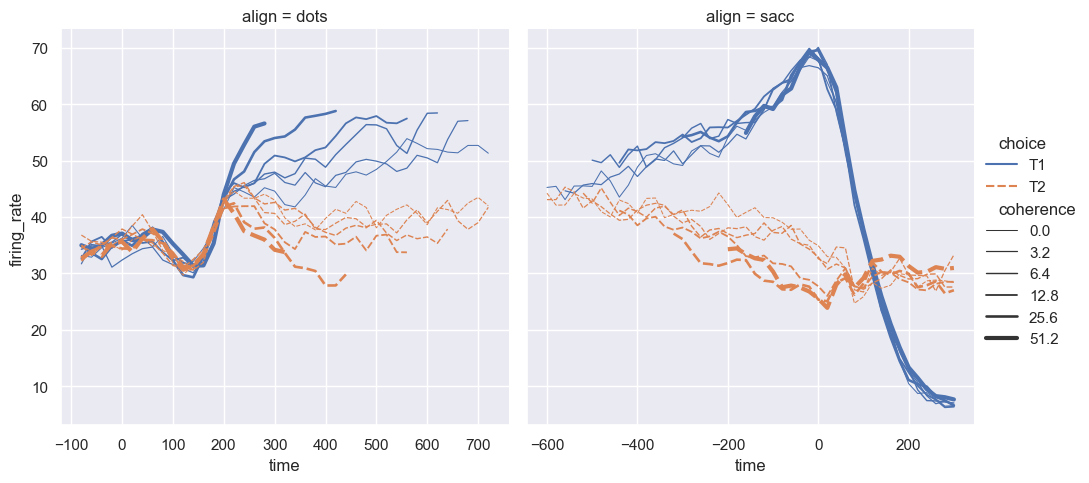

In [99]:
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

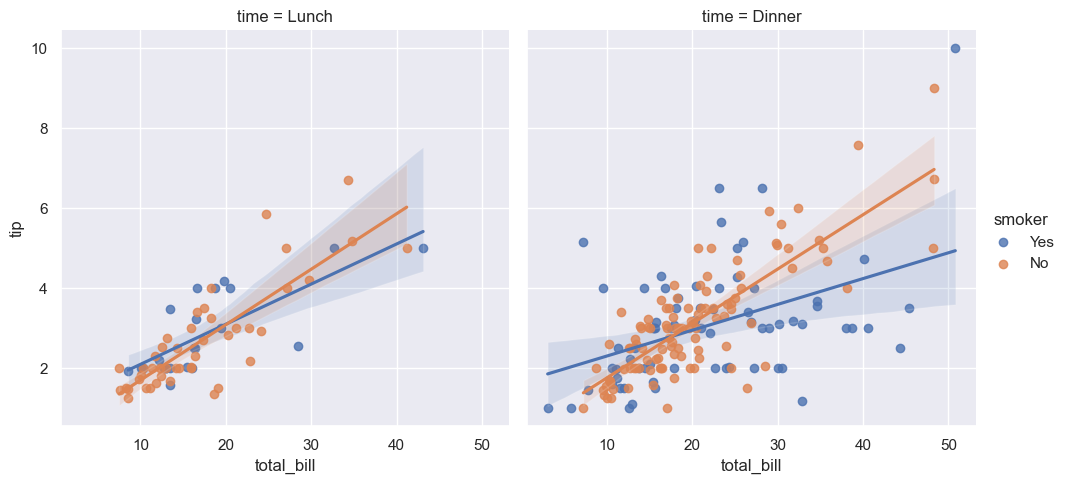

In [100]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

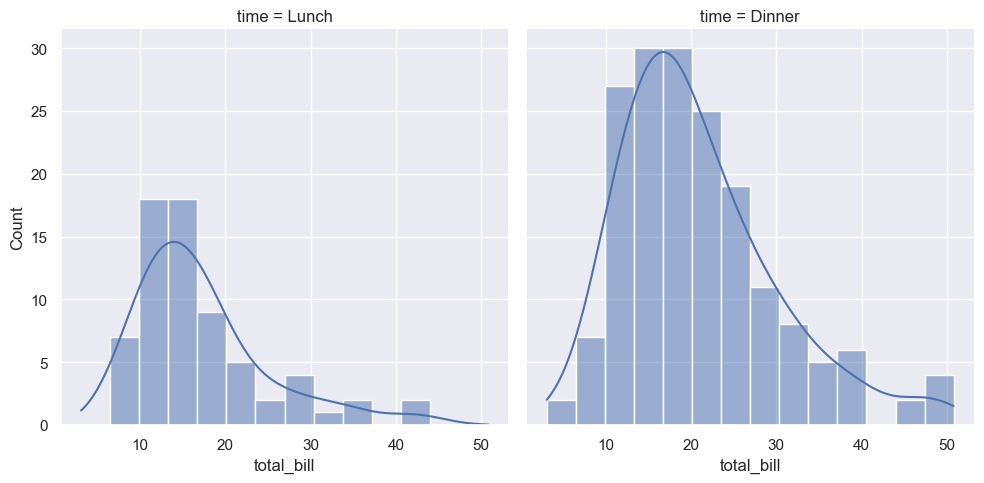

In [91]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

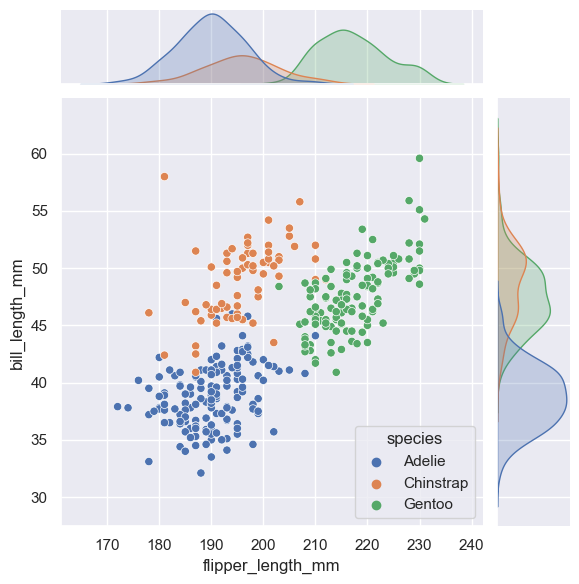

In [93]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

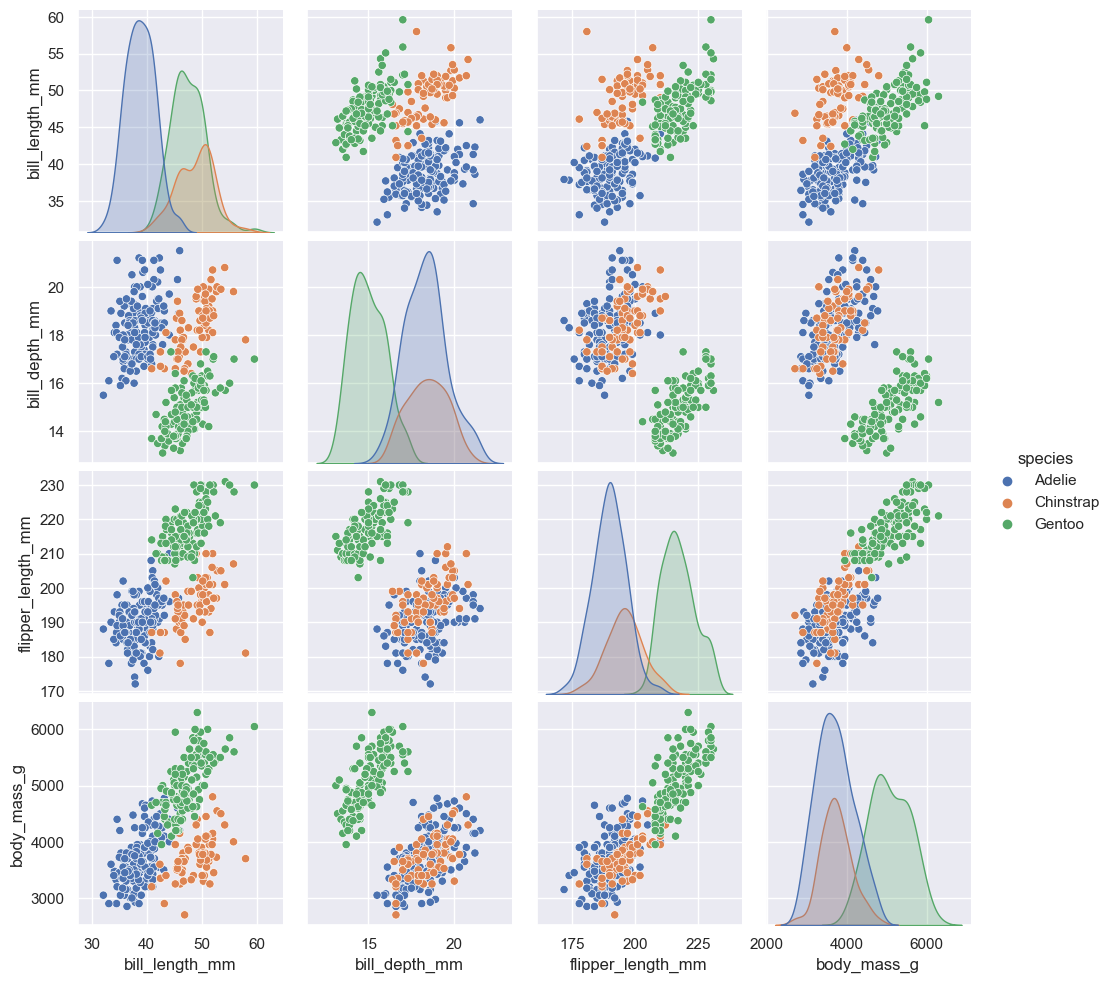

In [94]:
sns.pairplot(data=penguins, hue="species")

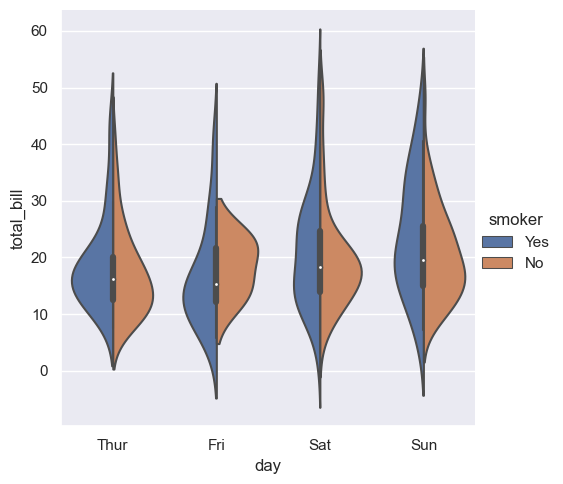

In [103]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)


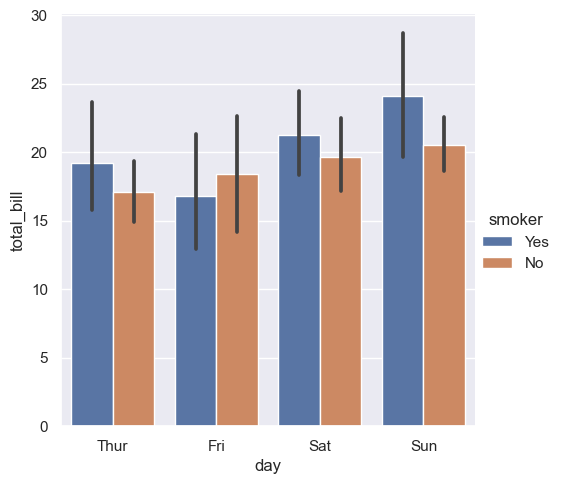

In [104]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")

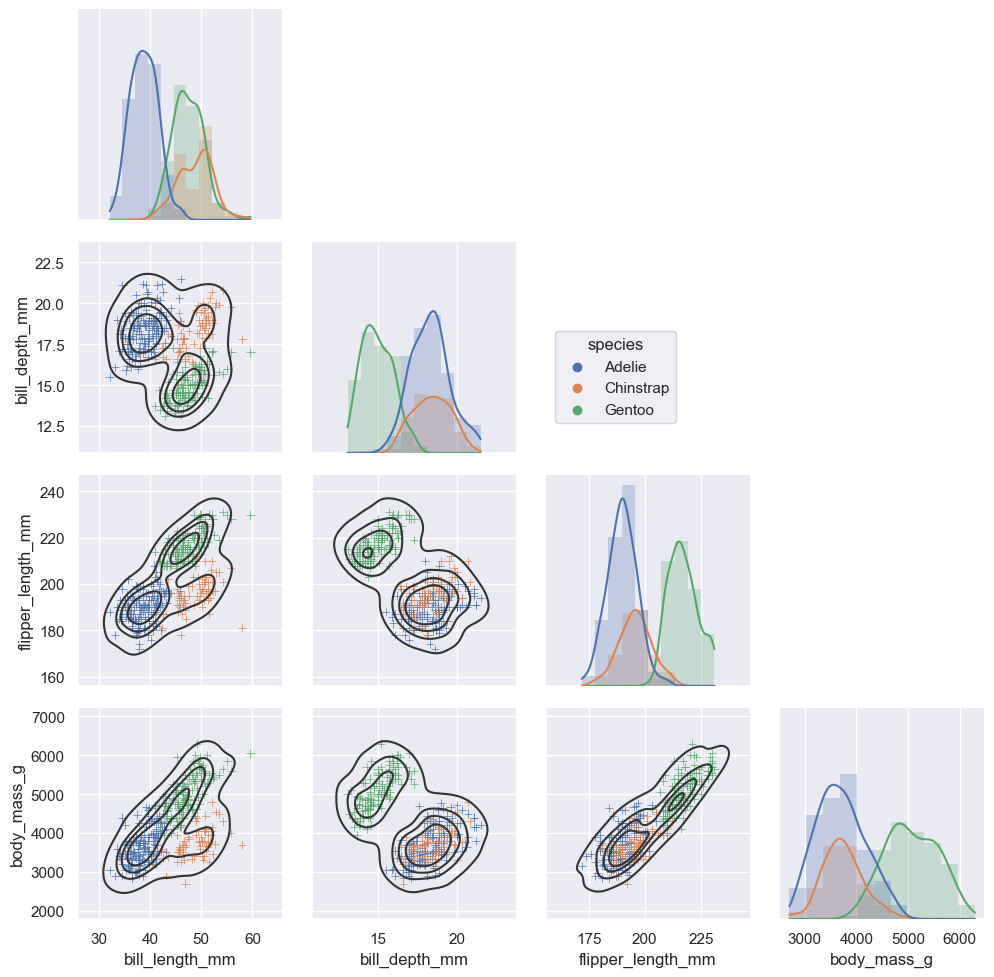

In [105]:
g = sns.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

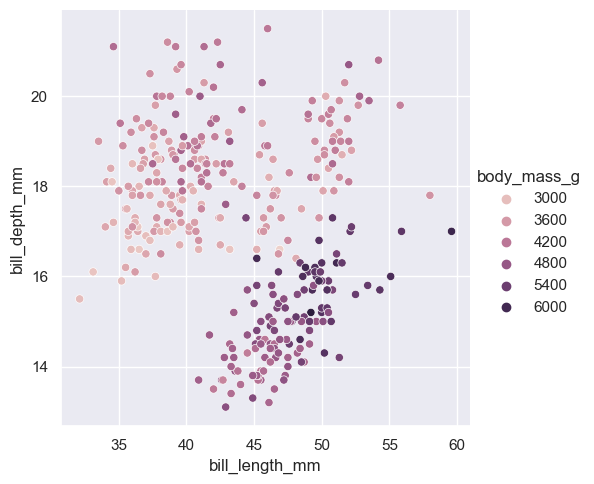

In [106]:
sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g"
)

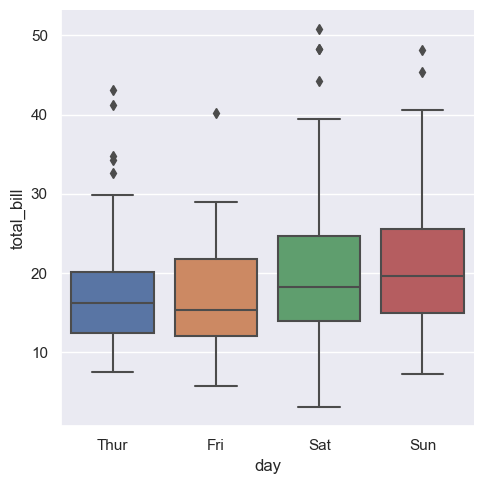

In [107]:
sns.catplot(data=tips, x="day", y="total_bill", kind="box")